In [1]:
# Double check TF 2.0x is installed. If you ran the above block, there was a 
# 'reset all runtimes' button at the bottom that you needed to press
import tensorflow as tf
print(tf.__version__)

2.3.0


In [2]:
# If the import fails, run this
# !pip install -q tensorflow-datasets

import tensorflow_datasets as tfds
imdb, info = tfds.load("imdb_reviews/subwords8k", with_info=True, as_supervised=True)

Shuffling and writing examples to /Users/anujdutt/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteF6ZL6K/imdb_reviews-train.tfrecord


Shuffling and writing examples to /Users/anujdutt/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteF6ZL6K/imdb_reviews-test.tfrecord


Shuffling and writing examples to /Users/anujdutt/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteF6ZL6K/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /Users/anujdutt/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [3]:
# Load Training and Test Datsset
train_data, test_data = imdb['train'], imdb['test']

# Modify the Labels
train_data = train_data.map(lambda x, y: (x, tf.expand_dims(y, -1)))
test_data = test_data.map(lambda x, y: (x, tf.expand_dims(y, -1)))

In [4]:
# Load the TFDS built in Tokenizer
tokenizer = info.features['text'].encoder

In [5]:
print(tokenizer.subwords)

['the_', ', ', '. ', 'a_', 'and_', 'of_', 'to_', 's_', 'is_', 'br', 'in_', 'I_', 'that_', 'this_', 'it_', ' /><', ' />', 'was_', 'The_', 'as_', 't_', 'with_', 'for_', '.<', 'on_', 'but_', 'movie_', ' (', 'are_', 'his_', 'have_', 'film_', 'not_', 'ing_', 'be_', 'ed_', 'you_', ' "', 'it', 'd_', 'an_', 'he_', 'by_', 'at_', 'one_', 'who_', 'y_', 'from_', 'e_', 'or_', 'all_', 'like_', 'they_', '" ', 'so_', 'just_', 'has_', ') ', 'her_', 'about_', 'out_', 'This_', 'some_', 'ly_', 'movie', 'film', 'very_', 'more_', 'It_', 'would_', 'what_', 'when_', 'which_', 'good_', 'if_', 'up_', 'only_', 'even_', 'their_', 'had_', 'really_', 'my_', 'can_', 'no_', 'were_', 'see_', 'she_', '? ', 'than_', '! ', 'there_', 'get_', 'been_', 'into_', ' - ', 'will_', 'much_', 'story_', 'because_', 'ing', 'time_', 'n_', 'we_', 'ed', 'me_', ': ', 'most_', 'other_', 'don', 'do_', 'm_', 'es_', 'how_', 'also_', 'make_', 'its_', 'could_', 'first_', 'any_', "' ", 'people_', 'great_', 've_', 'ly', 'er_', 'made_', 'r_', 'B

In [6]:
# Test Tokenizer
sample_string = 'TensorFlow, from basics to mastery'

tokenized_string = tokenizer.encode(sample_string)
print ('Tokenized string is {}'.format(tokenized_string))

original_string = tokenizer.decode(tokenized_string)
print ('The original string: {}'.format(original_string))

Tokenized string is [6307, 2327, 4043, 2120, 2, 48, 4249, 4429, 7, 2652, 8050]
The original string: TensorFlow, from basics to mastery


In [7]:
# Tokens to Word Mapping
for ts in tokenized_string:
    print ('{} ----> {}'.format(ts, tokenizer.decode([ts])))

6307 ----> Ten
2327 ----> sor
4043 ----> Fl
2120 ----> ow
2 ----> , 
48 ----> from 
4249 ----> basi
4429 ----> cs 
7 ----> to 
2652 ----> master
8050 ----> y


In [8]:
# Prepare Dataset
BUFFER_SIZE = 10000

# Batch Size
BATCH_SIZE = 64

# Training and Test Data with Padding
train_dataset = train_data.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_data.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_data))

In [9]:
# Embedding layer Size
embedding_dim = 64

# Model Definition
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Train the Model
num_epochs = 10

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

history = model.fit(train_data, epochs=num_epochs, validation_data=test_data)

Epoch 1/10
25000/25000 [==============================] - 263s 11ms/step - loss: 0.6850 - accuracy: 0.5371 - val_loss: 0.6862 - val_accuracy: 0.5366
Epoch 2/10
25000/25000 [==============================] - 263s 11ms/step - loss: 0.6825 - accuracy: 0.5428 - val_loss: 0.6863 - val_accuracy: 0.5384
Epoch 3/10
25000/25000 [==============================] - 252s 10ms/step - loss: 0.6813 - accuracy: 0.5452 - val_loss: 0.6877 - val_accuracy: 0.5371
Epoch 4/10
25000/25000 [==============================] - 259s 10ms/step - loss: 0.6801 - accuracy: 0.5472 - val_loss: 0.6869 - val_accuracy: 0.5383
Epoch 5/10
25000/25000 [==============================] - 250s 10ms/step - loss: 0.6792 - accuracy: 0.5484 - val_loss: 0.6873 - val_accuracy: 0.5378
Epoch 6/10
25000/25000 [==============================] - 254s 10ms/step - loss: 0.6787 - accuracy: 0.5495 - val_loss: 0.6882 - val_accuracy: 0.5373
Epoch 7/10
25000/25000 [==============================] - 250s 10ms/step - loss: 0.6784 - accuracy: 0.5494

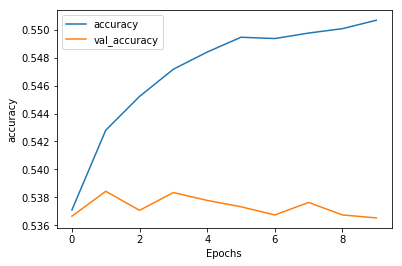

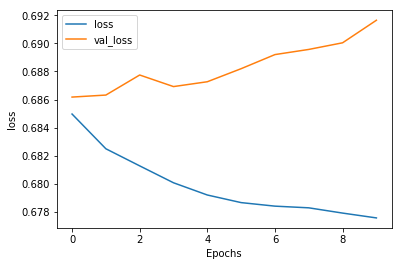

In [11]:
# Plot Model Evaluation metrics
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [12]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, tokenizer.vocab_size):
    word = tokenizer.decode([word_num])
    embeddings = weights[word_num]
    out_m.write(word + "\n")
    out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

(8185, 64)
